# DBSCAN

## Density Based Clustering

In [ ]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Clustering 

Recall that clustering is an **unsupervised** ML algorithm which **partitions data points into groups, known as clusters**, such that points with similar properties are grouped together. The aim is to reveal underlying structure about the data.

<br>

Numerous methods exist for clustering, each utilizing various distance metrics. One method is K-Means, which computes the (Euclidean) distance between data points and iteratively alternates between assigning a point to the closest cluster center and then setting the new cluster center as the mean of all its points. 

<br>

Nevertheless, K-Means clustering has several limitations that makes it unsuitable for certain types of data, as depicted in the figure below. Additionally, it requires the prior specification of the number of clusters.


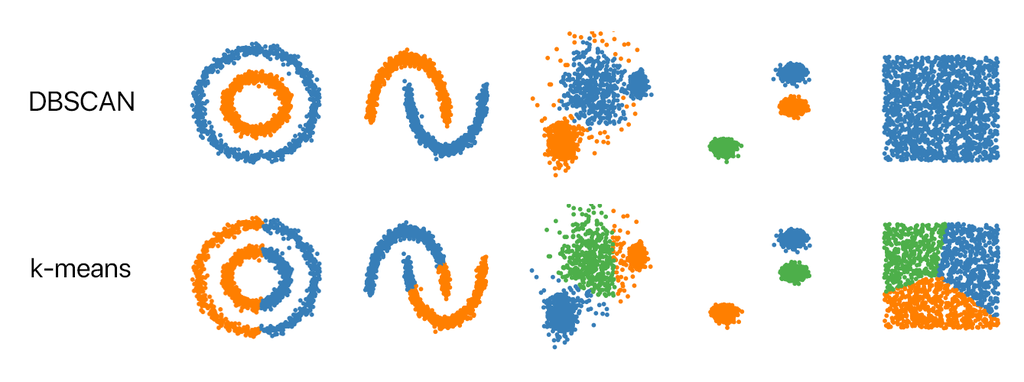


Clustering comprises of many methods beyond K-Means but all use a similar approach. That is, we first calculate the similarities between points, and then we use this to cluster our data into groups. DBSCAN, which will be explained in further detail in the next slides, considers a density based clustering  method which allows us to handle different types of data. 

As we can see in the figure, some clusters can be handled well by K-Means, but more obscure shapes can be split incorrectly. Every point is assigned to a cluster via the K-Means which makes it difficult to detect outliers, an area which DBSCAN is particularly efficient for. 

Find the figure [here](https://github.com/NSHipster/DBSCAN).

## DBSCAN

DBSCAN stands for **d**ensity-**b**ased **s**patial **c**lustering of **a**pplications with **n**oise.

<br>

What does this mean? 

- Density-based clustering methods identify clusters based on the idea that **a cluster is a region of high point density, separated from other clusters by a region of low point density.** 

- In particular, DBSCAN is suited for handling data with **clusters of any shape** and which has **noise and/or outliers.** 

- Another key feature is that it **doesn't require the user to set the number of clusters** before running the algorithm

## DBSCAN: How does it work?

The DBSCAN algorithm uses two parameters:

- **minPts:** The minimum number of points clustered together for a region to be considered dense.
    
- **eps:** A distance measure used to locate the neighbours of any point. 

Based on these two parameters, points can be classed as one of three types. 

- **Core points:** These are points within a dense region. They lie inside a cluster and specifically are points with at least minPts within a radius of eps.

- **Border points:** These are points that have at least one core point within a distance eps.

- **Noise/outlier points:** There are points that are neither a core nor a border and it has less than minPts within eps from itself. 

#### Let's visualise this in the case when minPts is 4!

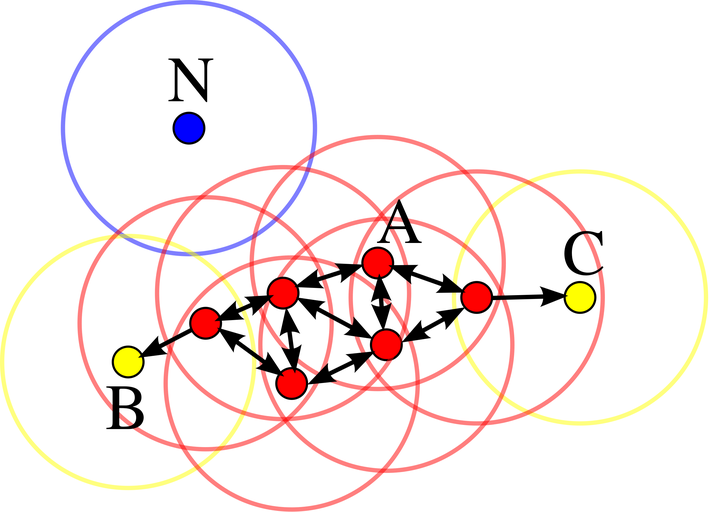

These two parameters form the fundamental considerations for the DBSCAN algorithm. 

- minPts: The minimum number of points clustered together for a region to be considered dense.
    - For example: if we set minPts to be equal to 5, then we need at least 5 points to form a dense region.
    
- eps: A distance measure that will be used to locate the points in the neighborhood of any point. 
    - In other words: this parameter specifies how close points should be to each other to be considered part of a cluster. So if the distance between two points is less than eps, they are considered neighbours or 'reachable'.


Based on these two parameters, parameters can be classes as one of three types. 

- Core points: These are points within a dense region. 
    - So, a point is classed as a core point if there are at least minPts points (including the point itself), within a radius of eps.
    
- Border points: These are points that have at least one core point within a distance eps.
    - So a point is a border point if it is reachable from a core point and there are less than minPts surrounding it. 
    
- Noise/outlier points: There are points that are neither a core nor a border and it is not directly reachable from any core points.  


In the diagram shown, minPts = 4. 

Point A and the other red points are core points. This is because within eps of each of these points, there are at least minPts (4) points. Remember we include the point itself when counting. 

Points B and C are border points as they have a core point within a distance of eps, and there are less than 4 points surrounding each of them. 

Point N is a noise point as it is neither a core point nor a border point. It is also not within eps of a core point. 



Reference:  Introduction to Machine Learning with Python by Andreas C. Müller & Sarah Guido

## Defining clusters

We first define two more terms used to classify a cluster. 

- A point q is **directly reachable** from p if point q is within eps of a core point p. 

- A point q is **reachable** from p if there is a path from p to q such that each point is directly reachable from the previous point. This means that all points must be core points, with the only possible exception being q.

Referring back to the previous figure, we have :

- Point A and the other red points are core points. As they are all reachable from one another, they form a single cluster. 

- Points B and C are not core points, but are reachable from A (via other core points) and thus belong to the cluster as well.

- Point N is a noise point that is neither a core point nor directly-reachable.

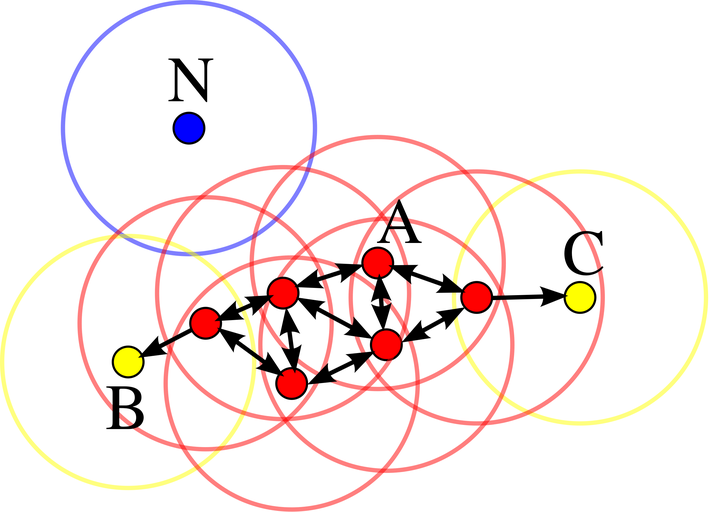

If p is a core point, then it forms a cluster together with all points (core or non-core) that are reachable from it. Each cluster contains at least one core point. Note that border points are named as such as they cannot be used to reach more points. 

Find the figure [here](https://en.wikipedia.org/wiki/DBSCAN).

## DBSCAN: The algorithm

- Select minPts and eps

- Select a point at random to start and consider the region of radius eps around it. If there are at least minPts in the neighbourhood then we class the point are a core point and form a cluster of all the points. 

- The same algorithm is applied to all of the points in the neighbourhood of the initial point. 

- If there are less than minPts in a neighbourhood, we class the point as noise. 

- We continue this process, randomly choosing points that have not been visited in the previous steps.

- The algorithm is complete when all points have been visited. 

- **NOTE**: A noise point may be revisited and end up being classified as a border point of another cluster. 

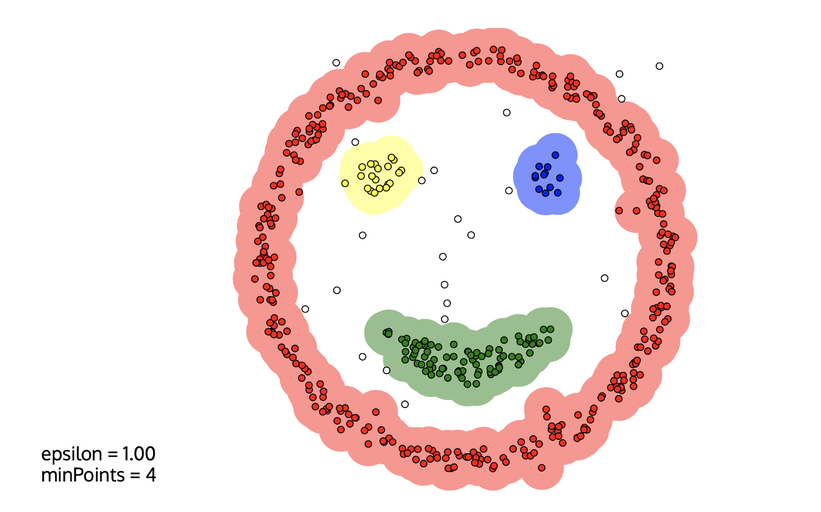


An interactive visualisation can be found [here](https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/).

Note that whilst we do not explicitly set the number of clusters in DBSCAN, eps will implicitly control how many clusters are found.

## Data

Here we are going to explore using the built in functions of sklearn to generate our own dataset. This can be a very useful exercise as it allows us to easily vary the nature of the data and explore how different algorithms perform.

In [ ]:
from sklearn import datasets

n_samples = 1500
X, y = datasets.make_moons(n_samples=n_samples, noise=0.05)

In [ ]:
# scatter plot, dots colored by class value
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

This type of shaped data, as we will see, is challenging for the K-means clustering algorithm. Let's use this function to make our own smiley face dataset.

In [ ]:
def make_smiley_face(n_samples, smile_noise, background_noise_points):
    """
    This function generates a 'smiley face' dataset with a user-input number of background noise points. 
    """
    # Make moon shapes  for the smile
    Xmoons, ymoons = datasets.make_moons(n_samples=n_samples, noise=smile_noise)
    Xsmile = Xmoons[ymoons==1]
    
    # Set central coordinates for each eye
    Xeye1_coord = 0.5
    Xeye2_coord = 1.5
    yeyes = 1.25
    
    # Jitter with random noise
    eye1 = np.tile([Xeye1_coord, yeyes],(n_samples,1)) + np.transpose([0.05*(np.random.uniform(0,1,n_samples) - 0.5), 0.5*(np.random.uniform(0,1,n_samples) - 0.5)])
    eye2 = np.tile([Xeye2_coord, yeyes],(n_samples,1)) + np.transpose([0.05*(np.random.uniform(0,1,n_samples) - 0.5), 0.5*(np.random.uniform(0,1,n_samples) - 0.5)])    
    
    # Add background noise points
    bckgd_noise = np.transpose([np.random.uniform(-0.2, 2.2, background_noise_points), np.random.uniform(-0.6, 1.5, background_noise_points)])
    
    # Create dataframe of data
    dfsmile = pd.DataFrame(dict(x=Xsmile[:,0], y=Xsmile[:,1], label=0, colourlabel='g'))
    dfeye1 = pd.DataFrame(dict(x=eye1[:,0], y=eye1[:,1], label=1, colourlabel='b'))
    dfeye2 = pd.DataFrame(dict(x=eye2[:,0], y=eye2[:,1], label=2, colourlabel='r'))
    dfnoise = pd.DataFrame(dict(x=bckgd_noise[:,0], y=bckgd_noise[:,1], label=2, colourlabel='k'))
    smiley_data = pd.concat([dfsmile, dfeye1, dfeye2, dfnoise])
    smiley_data.reset_index(inplace=True)
    smiley_data.drop('index', axis=1, inplace=True)
    return smiley_data

## Randomly generated data

In [ ]:
# Generate our data
df = make_smiley_face(2500, 0.01, 10)

In [ ]:
P = df.plot.scatter(x='x', y='y',c=df['colourlabel'])
plt.show()

## Parameter Estimation 

DBSCAN is dependent on two key parameters, **eps** and **minPts**. 

- **minPts:** In general, minPts ≥ D + 1, where D is the dimension of our data, and is chosen to be 3 or larger.
    - Larger values are usually better for noisy data and will yield more significant clusters. 
    - An initial value of minPts = 2xD can be used, but it may be necessary to choose larger values for very large or very noisy data.

- **eps:** A k-distance graph can be used. This is where we plot the distance to the k = minPts-1 nearest neighbours ordered from the largest to the smallest value. Good values of eps are where this plot shows an 'elbow'. We will see this in practice.
    - If the eps is chosen too small, a large part of the data will not be clustered as it will be considered an outlier.
    - If the value is too high, clusters will merge.
    - In general small eps values are preferable.     

## A starting value for eps

In general, it is useful to first see the spread of distances in the data set before the parameter eps can be chosen. Ideally we also use **domain knowledge** to form a decision about what choices are sensible for our problem. 

Measure the distance of each point to its closest neighbor using the function `sklearn.metrics.pairwise.pairwise_distances`. The documentation can be accessed [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise_distances.html), and then plot the distribution of the distances.


In [ ]:
from sklearn.metrics.pairwise import pairwise_distances

# Compute all the pairwise distances
all_distances = pairwise_distances(df[['x','y']], metric='euclidean')

In [ ]:
# Compute the distance of each point to its closest neighbor
neig_distances = [np.min(row[np.nonzero(row)]) for row in all_distances]

In [ ]:
# Plot the distances
plt.hist(neig_distances, bins=500, density=True)
plt.xlabel('Distance from closest sample')
plt.ylabel('Occurrences')
plt.title('Distance Graph')
plt.show()

The distribution of the distance is helpful to choose a starting point for `eps`. It's very likely that a point has at least one neighbour in a radius of 0.01 and that only very few point have one at distance over 0.02. Since we want that a core point has more than one point in the `eps` neighborhood, we can start picking `eps` on the right tail of the distribution. We start with 0.02.

## Applying DBSCAN

Here, we cluster the smiley-face data with DBSCAN.

In [ ]:
from sklearn.cluster import DBSCAN
# Apply DBSCAN setting eps to 0.02 and min samples to 5
db = DBSCAN(eps=0.03, min_samples=5)
cluster_assignment = db.fit_predict(df.iloc[:,[0,1]])

In [ ]:
# Display how many clusters were found

clusters_found = np.unique(cluster_assignment)
print ('Clusters found', len(clusters_found))

## Plotting the result

We can allocate colours for each cluster and plot it to compare to the original.

In [ ]:
df['prediction'] = cluster_assignment

colours = ['green', 'blue', 'red', 'black']
df['prediction_colour'] = df['prediction'].apply(lambda x: colours[x  % len(colours)])
df.head()


# Note the below code will also work:
# row_indexes0=df[df['prediction']==0].index
# row_indexes1=df[df['prediction']==1].index
# row_indexes2=df[df['prediction']==2].index
# row_indexes3=df[df['prediction']==-1].index
# df.loc[row_indexes0, 'prediction_colour'] = 'green'
# df.loc[row_indexes1, 'prediction_colour'] = 'blue' 
# df.loc[row_indexes2, 'prediction_colour'] = 'red' 
# df.loc[row_indexes3, 'prediction_colour'] = 'black'

In [ ]:
df.plot.scatter(x='x', y='y', c=df['prediction_colour'])
plt.ylim(ymax = 1.75, ymin = -0.6)
plt.show()

## Compare with K-Means

We can select either 3 or 4 clusters for the K-Means algorithm. We know that there should be 4 including the outliers, but we can also make an educated guess that using 3 may perform better. 

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(init="random", n_clusters=3, n_init=10, max_iter=300, random_state=42)
kmeans.fit(df.iloc[:,[0,1]])
df['kmeans_prediction'] = kmeans.labels_

colours = ['green', 'red', 'blue', 'black']
df['kmeans_colour'] = df['kmeans_prediction'].apply(lambda x: colours[x  % len(colours)])
df.head()

In [ ]:
df.plot.scatter(x='x', y='y', c=df['kmeans_colour'])
plt.ylim(ymax = 1.75, ymin = -0.6)
plt.show()

As expected, the algorithm has not worked as well as with DBSCAN.

As shown in the plots, DBSCAN groups together data points that are close to each other in terms of density, forming dense regions separated by areas of lower density. 

In contrast, k-means operates by assigning data points to the centroid that is closest to them. In the plot example, the left part of the curve forming the smile is closer to the centroid representing the left eye, while the right part of the curve is closer to the centroid representing the right eye.

## How many clusters with DBSCAN?

Vary `eps` and `min_samples` and study how the number of clusters varies as result. This way we'll have an idea of how many cluster we get varying the parameters. This can help us choose the parameters if we already have an idea of how many clusters we want to create.

Warning, if you cover a grid of points, it may take a while to finish, don't put too many points!

In [ ]:
# WARNING this may take a couple of minutes to finish!
eps = np.linspace(0.005, 0.1, 20)
mins = np.linspace(4, 64, 11)
Z = np.zeros((len(eps), len(mins)))

for i, e in enumerate(eps):
    for j, m in enumerate(mins):
        db   = DBSCAN(eps=e, min_samples=m)
        pred = db.fit_predict(df[['x','y']])
        clusters_found = len(np.unique(pred))
        Z[i,j] = clusters_found

In [ ]:
# Visualise this using a heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(Z, cmap='RdBu', center=0, annot=True);
plt.xticks(np.arange(Z.shape[1]), mins)
plt.xticks(rotation=90)
plt.xlabel('min_samples')
plt.yticks(np.arange(Z.shape[0]), ['%0.2f' % x for x in eps])
plt.ylabel('eps');


In this case we know that 4 clusters is best so we can be sure to choose parameters that will give this. 

## Compute the silhouette score of the DBSCAN cluster

Compute the silhouette score of the clusters made with DBSCAN and compare it with the silhouette score achieved with K-Means.

The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b). To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of. 

A value of 1 denotes clearly distinguished clusters, 0 indicates that the distance between clusters is not significant and -1 indicates that the clusters are likely incorrectly assigned. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

You can read more about this [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html).

In [ ]:
# Compute the silhouette score of DBSCAN
from sklearn.metrics import silhouette_score
print(silhouette_score(df[['x','y']], df['prediction']))

print(silhouette_score(df[['x','y']], df['kmeans_prediction']))

## Compute the silhouette score of the DBSCAN cluster II

In [ ]:
# We can break this down and consider each of the three main clusters and their silhouette score
from sklearn.metrics import silhouette_samples
dbscan_sil = silhouette_samples(df[['x','y']], df['prediction'])
kmeans_sil = silhouette_samples(df[['x','y']], df['kmeans_prediction'])

print('Silhouette score of red cluster in DBSCAN', dbscan_sil[df['prediction_colour']=='red'].mean())
print('Silhouette score of red cluster in Kmeans', kmeans_sil[df['kmeans_colour']=='red'].mean())

print('Silhouette score of blue cluster in DBSCAN', dbscan_sil[df['prediction_colour']=='blue'].mean())
print('Silhouette score of blue cluster in Kmeans', kmeans_sil[df['kmeans_colour']=='blue'].mean())

print('Silhouette score of green cluster in DBSCAN', dbscan_sil[df['prediction_colour']=='green'].mean())
print('Silhouette score of green cluster in Kmeans', kmeans_sil[df['kmeans_colour']=='green'].mean())

## Limitations of DBSCAN

There are some limitations to DBSCAN:

- DBSCAN is less appropriate if there are many clusters with varying density, as it is not possible to select a different value of eps and minPts for each cluster. 

- Domain knowledge can help for determining an appropriate value for eps.

- Extension: A derivative of DBSCAN known as HDBSCAN (hierarchical DBSCAN) exists to allow for variation in the value of eps.

References:
    
- Martin Ester, Hans-Peter Kriegel, Jörg Sander, and Xiaowei Xu. 1996. A density-based algorithm for discovering clusters a density-based algorithm for discovering clusters in large spatial databases with noise. In Proceedings of the Second International Conference on Knowledge Discovery and Data Mining (KDD'96), Evangelos Simoudis, Jiawei Han, and Usama Fayyad (Eds.). AAAI Press 226-231.

- Sklearn implementation doc is given [here](http://scikit-learn.org/stable/modules/clustering.html#dbscan)

- Animated DBSCAN is found [here](http://www.naftaliharris.com/blog/visualizing-dbscan-clustering/).

- Extra: A modification of DBSCAN made by one of the original authors which removes the notion of border points. The paper is [here](https://dl.acm.org/doi/10.1145/2733381).